# APA - Problemas
## Lista 5 

## ¿Quién hace ruido en Barcelona por la noche?

### Barcelona es una ciudad turística, pero no siempre recibe los mejores turistas. El ruido por la noche es un problema recurrente (no siempre debido a los turistas obviamente). Dentro de los datos que recolecta la web de la ciutat al día del ayuntamiento de Barcelona está el número de personas que hay diariamente en la ciudad desglosado en diferentes procedencias, tanto desde municipios cercanos, provincias o países 3 . Otra información que está disponible es el nivel de ruido en la ciudad (contaminación acústica) tomado a diferentes horas, el que nos interesa el de las 4 de la mañana. En este caso podemos averiguar si el que haya más personas de ciertos lugares en la ciudad tiene relación con el nivel de ruido que hay por la noche.

### Puedes obtener estos datos mediante la función load_BCN_ruido de la librería apafib. Resuelve los siguientes apartados ilustrando los resultados de la manera que te parezca adecuada.

In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install matplotlib --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade 
# !pip install scikit-optimize --user --quiet
# !pip install eli5 --user --quiet
!pip install apafib --upgrade --user --quiet
!pip install wordcloud --upgrade --user --quiet

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

In [38]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.regressor import prediction_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
show_html = lambda html: display(HTML(html))

from sklearn.svm import LinearSVC, SVC, SVR

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                     f1_score, make_scorer, accuracy_score, roc_auc_score

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,ExtraTreesClassifier,RandomForestRegressor,GradientBoostingRegressor

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from sklearn.ensemble import StackingClassifier, VotingClassifier, StackingRegressor, VotingRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
from skopt import BayesSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import  RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from itertools import islice

import eli5
from eli5.sklearn import PermutationImportance
from dtreeviz import dtreeviz

import warnings
from apafib import load_attrition

from sklearn.inspection import permutation_importance

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)
from sklearn.datasets import fetch_openml

In [4]:
def save_results(train, test, name, df):
    df.loc[name,'train score (R2)'] = train
    df.loc[name,'test score (R2)'] = test
    return df

results_df = pd.DataFrame()

### a) Divide el conjunto de datos en entrenamiento y test (80 %/20 %). Haz una exploración mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables, especialmente con la variable objetivo. Describe las cosas que hayas visto que te parezcan interesantes. Transforma las variables adecuadamente según el modelo que utilices para poder ajustar modelos de regresión, tanto el conjunto de entrenamiento como el de test.

In [5]:
from apafib import load_BCN_ruido

data_ruido = load_BCN_ruido()

data_ruido.head()

,Visitants a Barcelona segons municipi d’origen / Badalona,Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat,Visitants a Barcelona segons municipi d’origen / Sabadell,Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet,Visitants a Barcelona segons municipi d’origen / Terrassa,Visitants a Barcelona segons país d’origen / Estats Units,Visitants a Barcelona segons país d’origen / França,Visitants a Barcelona segons país d’origen / Itàlia,Visitants a Barcelona segons país d’origen / Països Baixos,Visitants a Barcelona segons país d’origen / Regne Unit,Visitants a Barcelona segons província d’origen / Girona,Visitants a Barcelona segons província d’origen / Illes Balears,Visitants a Barcelona segons província d’origen / Lleida,Visitants a Barcelona segons província d’origen / Madrid,Visitants a Barcelona segons província d’origen / Tarragona,Contaminació acústica: Decibels / 4h
0,40999.0,77619.0,9223.0,37267.0,8862.0,409.0,10471.0,433.0,619.0,668.0,7549.0,2071.0,2771.0,6461.0,7489.0,48.13
1,56515.0,91817.0,11894.0,42309.0,10445.0,551.0,10897.0,591.0,648.0,858.0,8805.0,2493.0,3529.0,7545.0,7933.0,45.74
2,50135.0,85142.0,10405.0,39708.0,8891.0,472.0,8149.0,682.0,540.0,756.0,8613.0,2668.0,3225.0,7114.0,7640.0,46.91
3,73971.0,108752.0,18806.0,47866.0,17357.0,461.0,5437.0,554.0,517.0,787.0,12451.0,2823.0,4738.0,7021.0,13027.0,45.99
4,72851.0,110814.0,19057.0,48995.0,17257.0,428.0,4245.0,526.0,527.0,799.0,12371.0,2439.0,4565.0,6410.0,13016.0,46.99


In [6]:
data_ruido.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Visitants a Barcelona segons municipi d’origen / Badalona,365.0,69536.211,18388.625,8701.00,54047.00,69555.00,80253.00,106027.0
Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat,365.0,105363.822,22132.227,28682.00,87509.00,107152.00,118633.00,147522.0
Visitants a Barcelona segons municipi d’origen / Sabadell,365.0,19719.978,6100.520,1688.00,15520.00,19545.00,23560.00,33615.0
Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet,365.0,44862.866,9566.630,14772.00,38039.00,45776.00,51477.00,62202.0
Visitants a Barcelona segons municipi d’origen / Terrassa,365.0,17725.879,5453.135,1399.00,13743.00,17789.00,20880.00,29528.0
Visitants a Barcelona segons país d’origen / Estats Units,365.0,5022.507,4290.160,250.00,739.00,5960.00,8091.00,16230.0
Visitants a Barcelona segons país d’origen / França,365.0,20247.033,14724.095,1004.00,8149.00,16384.00,27620.00,59425.0
Visitants a Barcelona segons país d’origen / Itàlia,365.0,4989.781,3883.216,281.00,1577.00,4378.00,7679.00,16597.0
Visitants a Barcelona segons país d’origen / Països Baixos,365.0,2834.279,2748.928,143.00,1088.00,1758.00,3286.00,15286.0
Visitants a Barcelona segons país d’origen / Regne Unit,365.0,2775.877,2402.149,65.00,708.00,1534.00,4772.00,9046.0


In [7]:
X_orig = data_ruido.loc[:,data_ruido.columns!='Contaminació acústica: Decibels / 4h']
y_orig = data_ruido.loc[:,'Contaminació acústica: Decibels / 4h']

X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.2, random_state=42)

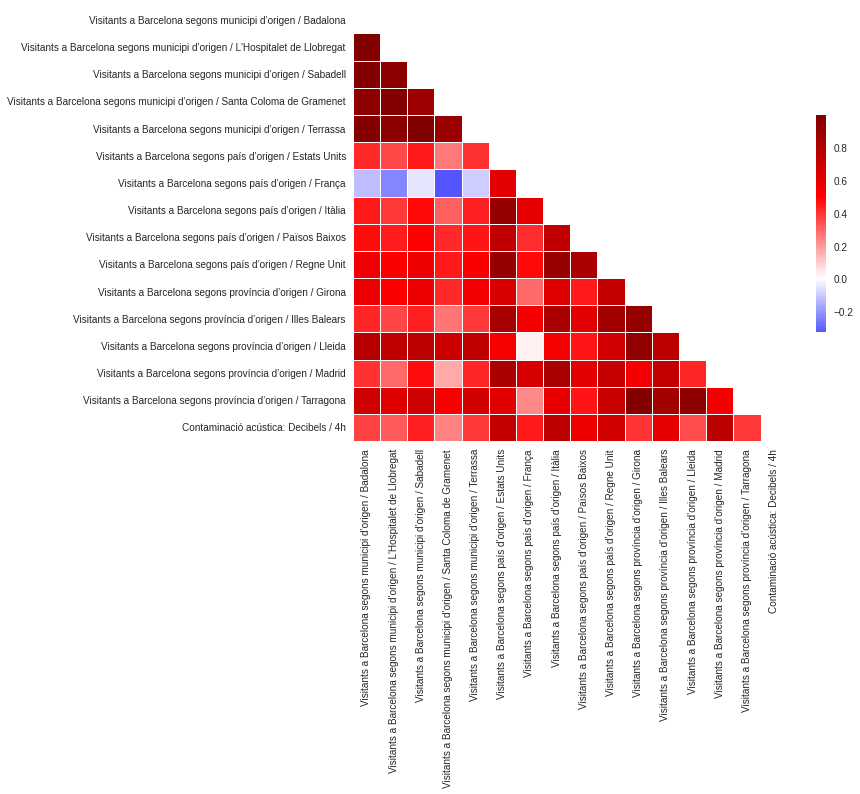

In [8]:
corr = data_ruido.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='seismic',  center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Observamos como se relacionan las variables entre ellas. Nos interesa especialmente la última línea pues es la correlación entre las variables y la variable objetivo. Los más directamente relacionados con la variable objetivo son los vistantes de Estados Unidos, Italia, Reino Unido, Islas Baleares y Madrid.

A continuación, queremos preparar nuestros datos para poder ajustar modelos de regresión en los apartados posteriores. Para ello vamos a normalizar aquellas variables que se requieran.

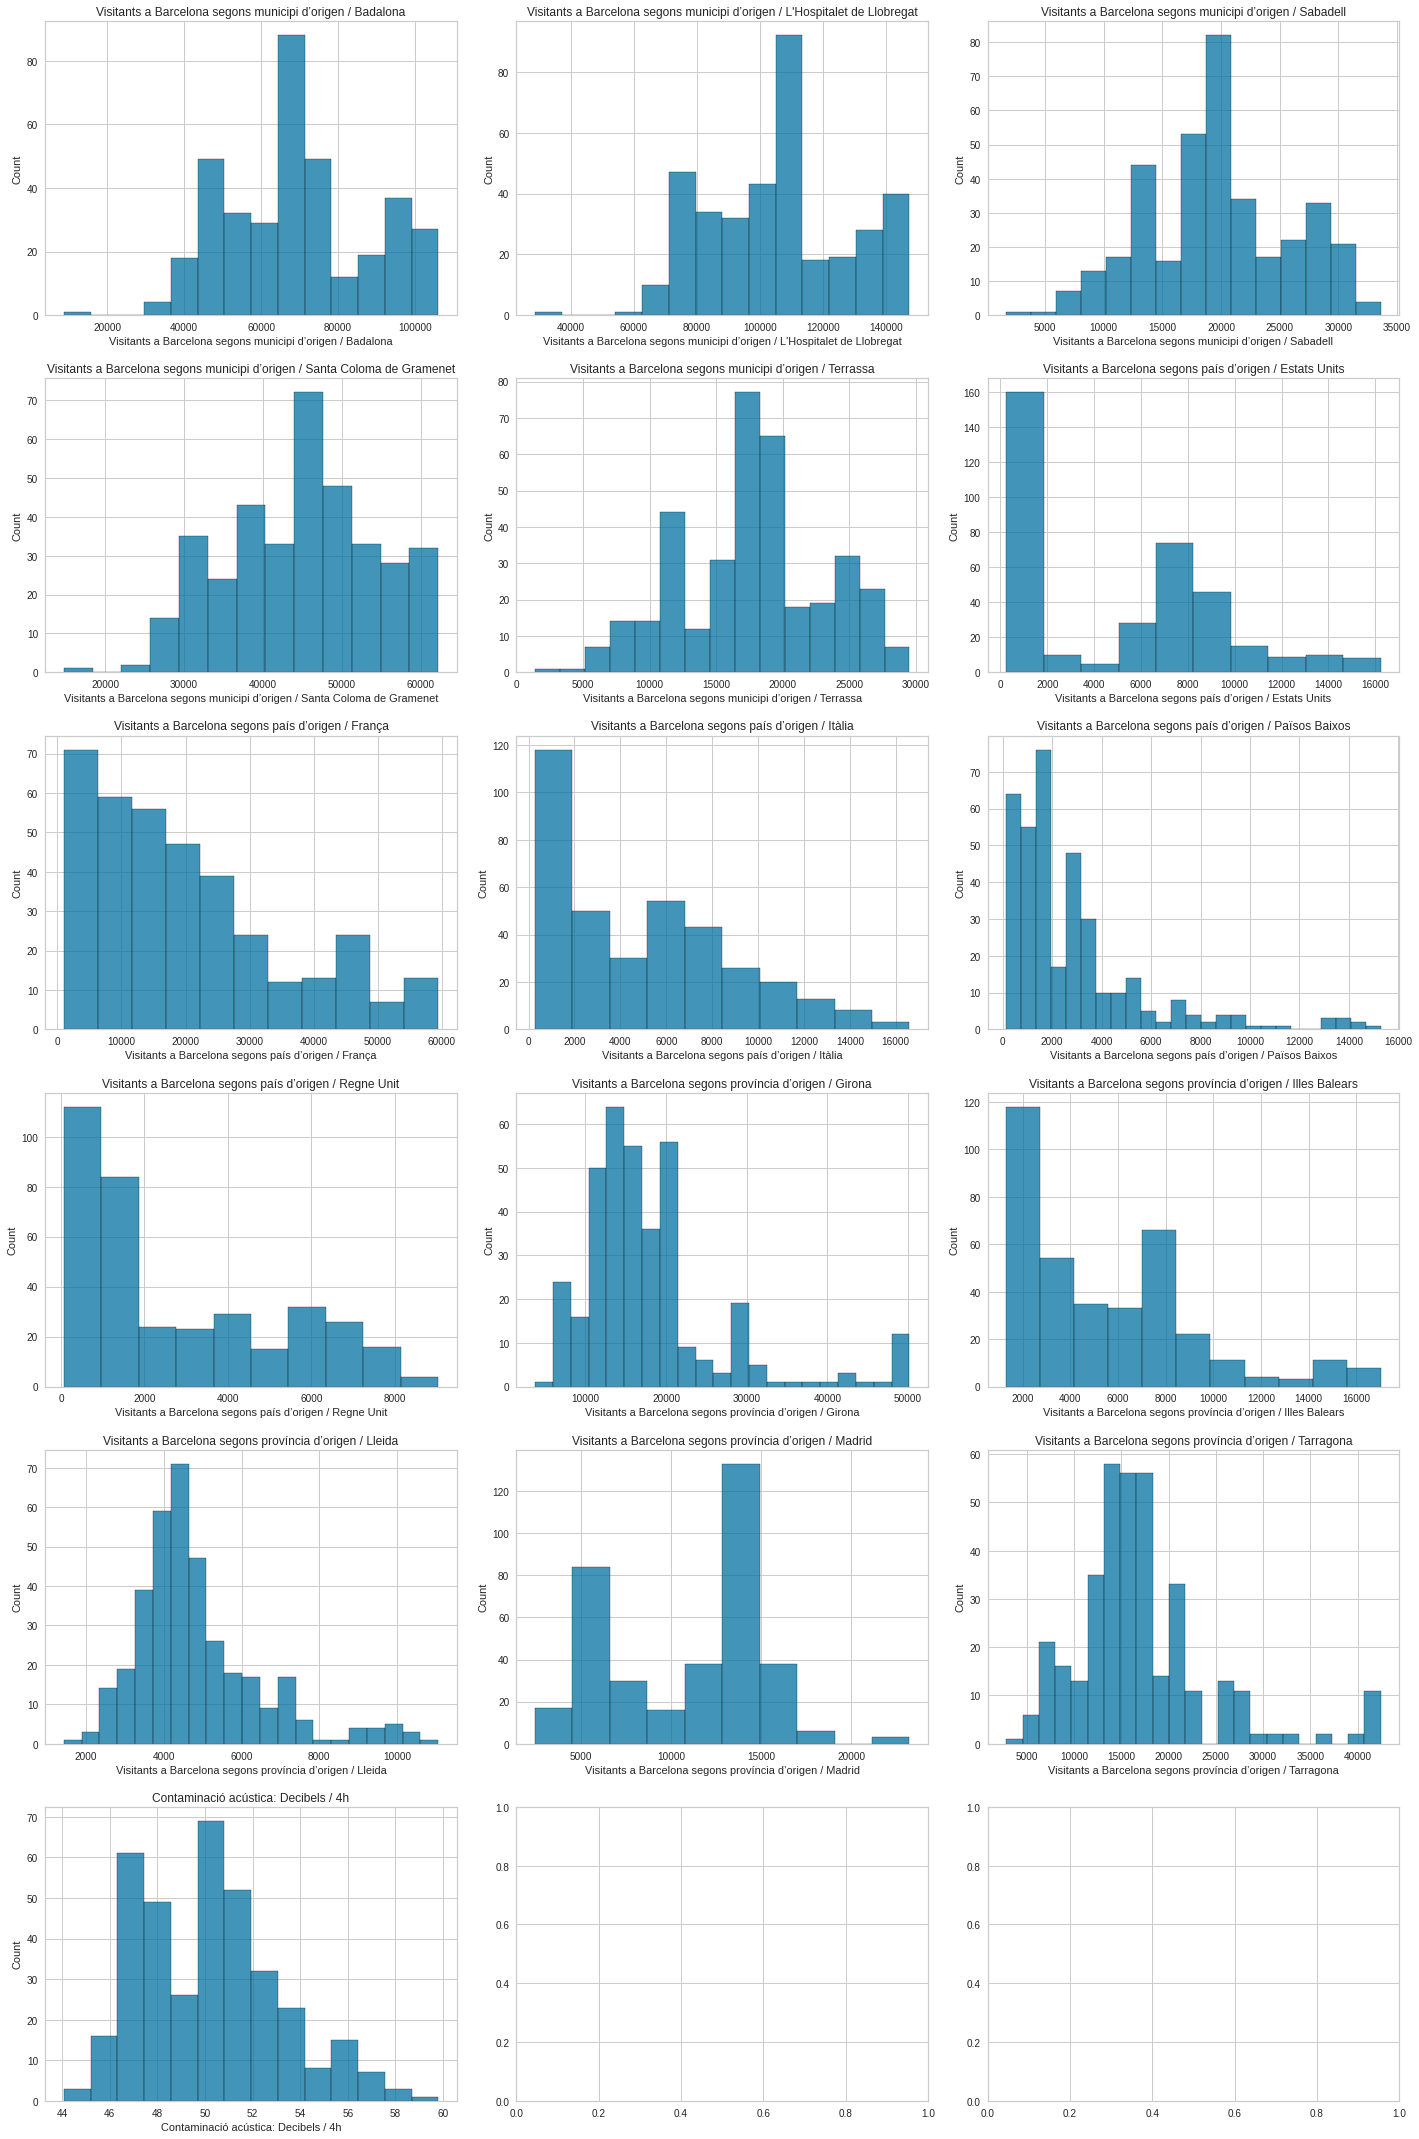

In [9]:
#Miramos la distribución de las variables numéricas

fig, axes = plt.subplots(6,3,figsize=(20,30))


for i, c in enumerate(data_ruido.columns[0:]):
    ax = axes.reshape(-1)[i]
    if data_ruido[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=data_ruido,ax=ax)
    else:
        b = sns.histplot(x=c,data=data_ruido,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

A pesar de que muchas de estas variables parecen seguir una distribución gaussiana, vamos a normalizar todas las variables para obtener modelos de regresión más precisos.

In [10]:
data_ruido['Visitants a Barcelona segons municipi d’origen / Badalona'] = np.log(data_ruido['Visitants a Barcelona segons municipi d’origen / Badalona'])
data_ruido["Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat"] = np.log(data_ruido["Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat"])
data_ruido['Visitants a Barcelona segons municipi d’origen / Sabadell'] = np.log(data_ruido['Visitants a Barcelona segons municipi d’origen / Sabadell'])
data_ruido['Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet'] = np.log(data_ruido['Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet'])
data_ruido['Visitants a Barcelona segons país d’origen / Estats Units'] = np.log(data_ruido['Visitants a Barcelona segons país d’origen / Estats Units'])
data_ruido['Visitants a Barcelona segons país d’origen / França'] = np.log(data_ruido['Visitants a Barcelona segons país d’origen / França'])
data_ruido['Visitants a Barcelona segons país d’origen / Itàlia'] = np.log(data_ruido['Visitants a Barcelona segons país d’origen / Itàlia'])
data_ruido['Visitants a Barcelona segons país d’origen / Països Baixos'] = np.log(data_ruido['Visitants a Barcelona segons país d’origen / Països Baixos'])
data_ruido['Visitants a Barcelona segons país d’origen / Regne Unit'] = np.log(data_ruido['Visitants a Barcelona segons país d’origen / Regne Unit'])
data_ruido['Visitants a Barcelona segons província d’origen / Girona'] = np.log(data_ruido['Visitants a Barcelona segons província d’origen / Girona'])
data_ruido['Visitants a Barcelona segons província d’origen / Illes Balears'] = np.log(data_ruido['Visitants a Barcelona segons província d’origen / Illes Balears'])
data_ruido['Visitants a Barcelona segons província d’origen / Lleida'] = np.log(data_ruido['Visitants a Barcelona segons província d’origen / Lleida'])
data_ruido['Visitants a Barcelona segons província d’origen / Madrid'] = np.log(data_ruido['Visitants a Barcelona segons província d’origen / Madrid'])
data_ruido['Visitants a Barcelona segons província d’origen / Tarragona'] = np.log(data_ruido['Visitants a Barcelona segons província d’origen / Tarragona'])

In [11]:
X_log = data_ruido.loc[:,data_ruido.columns!='Contaminació acústica: Decibels / 4h']
y_log = data_ruido.loc[:,'Contaminació acústica: Decibels / 4h']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

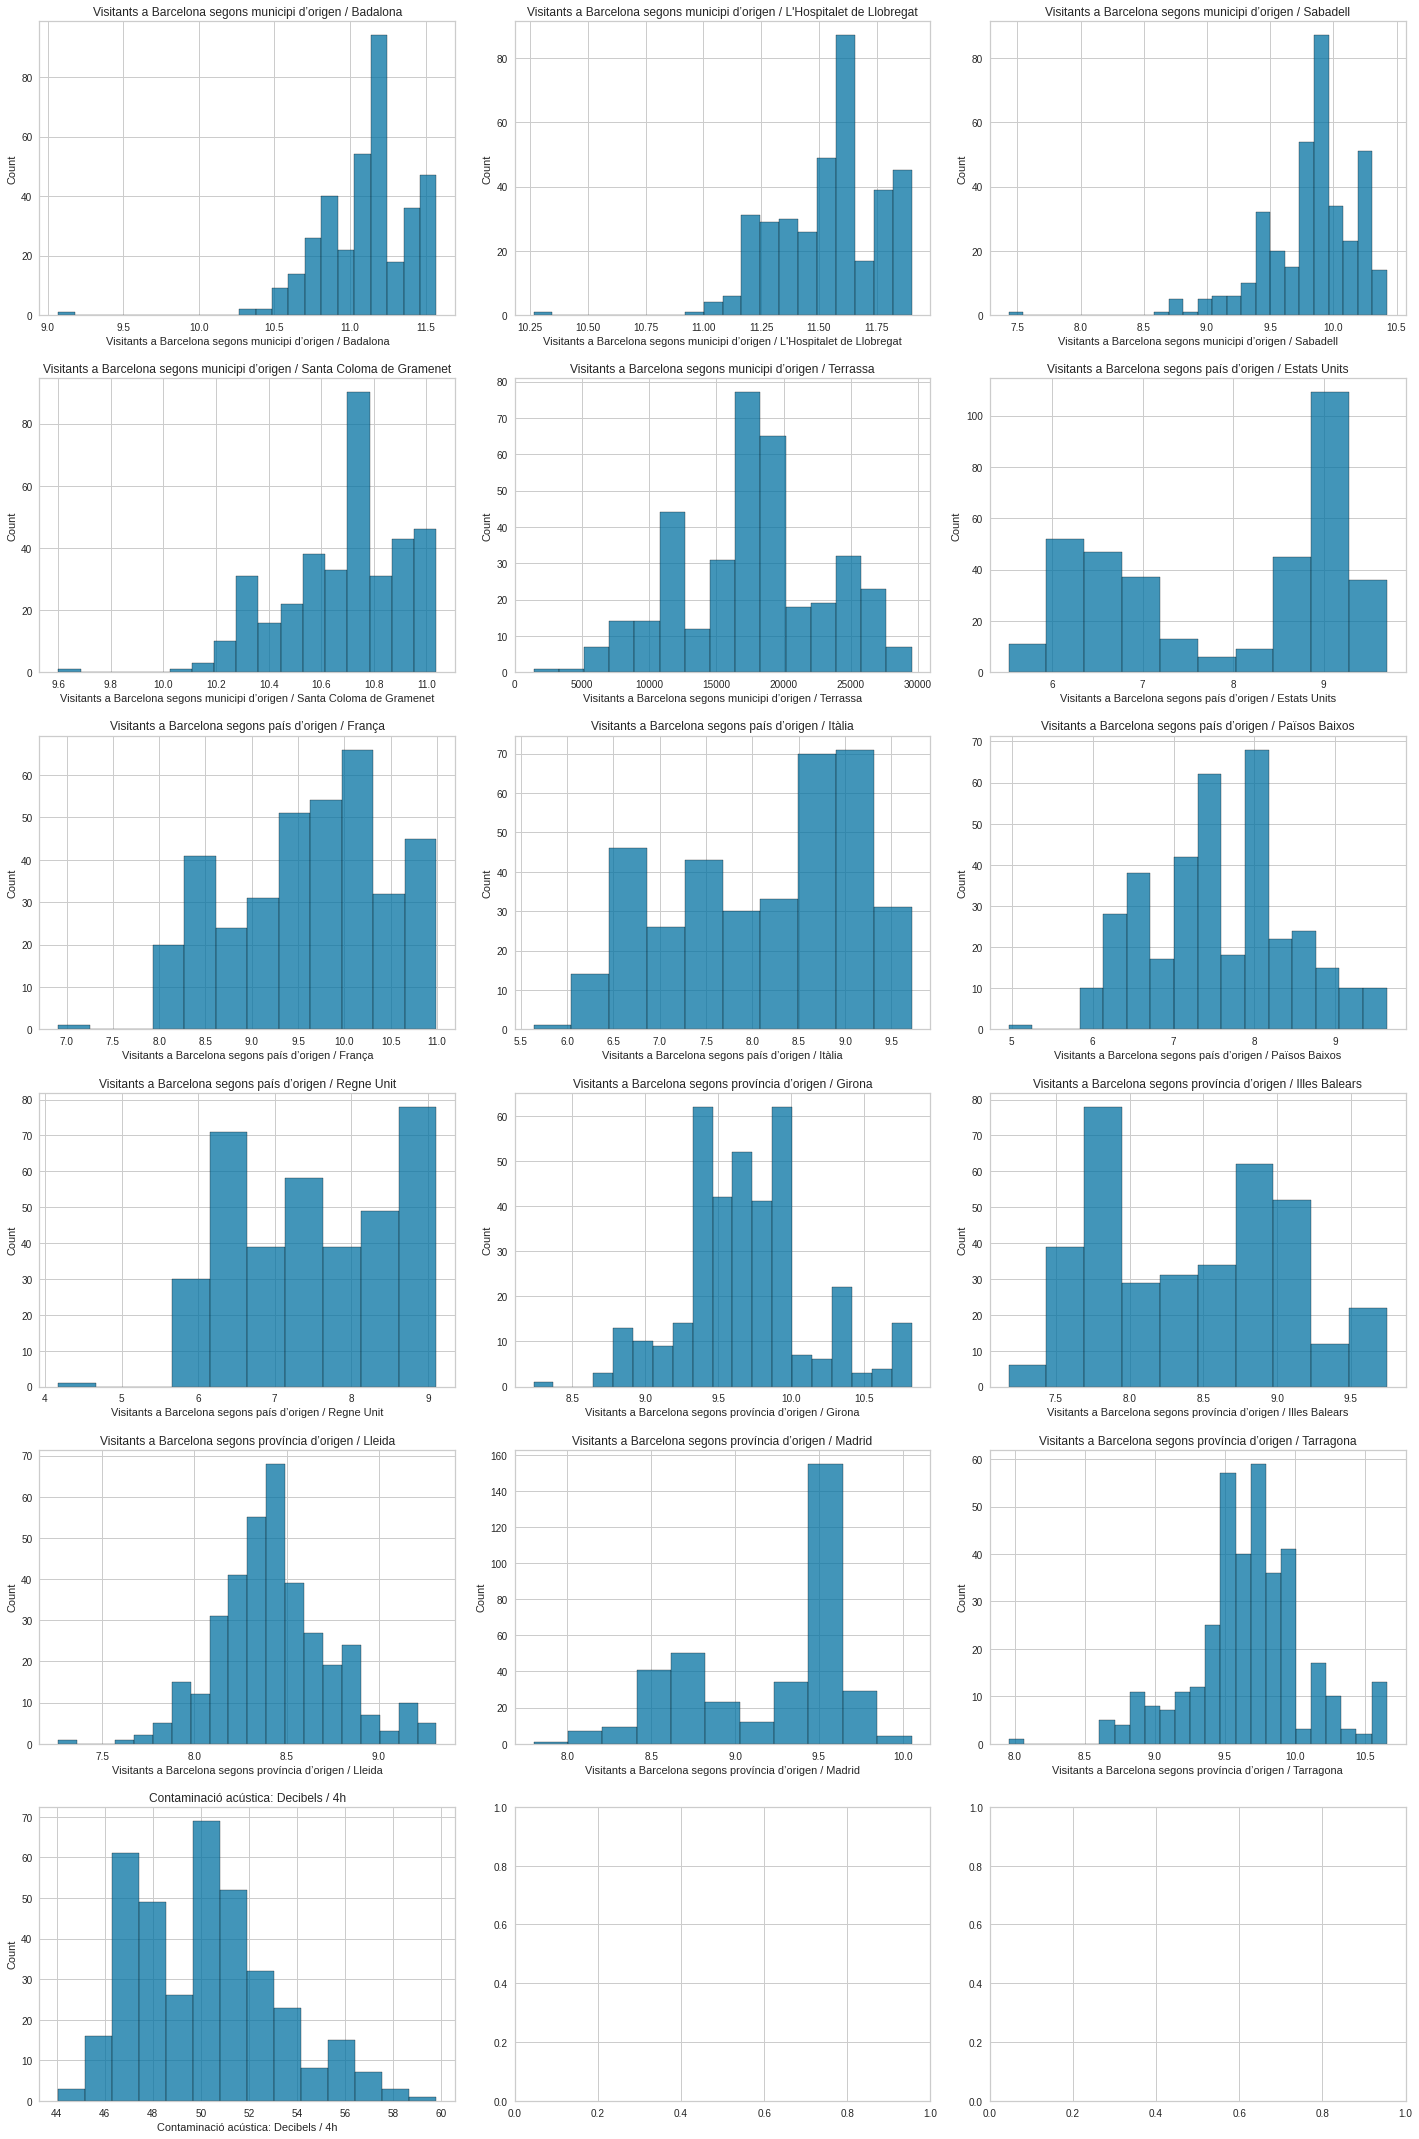

In [12]:
#Miramos la distribución de las variables numéricas

fig, axes = plt.subplots(6,3,figsize=(20,30))


for i, c in enumerate(data_ruido.columns[0:]):
    ax = axes.reshape(-1)[i]
    if data_ruido[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=data_ruido,ax=ax)
    else:
        b = sns.histplot(x=c,data=data_ruido,ax=ax)
    t = ax.set_title(c)
plt.tight_layout()

Hay una clara mejora respecto a las variables anteriores.

### b) Ajusta un modelo K-nearest neighbours de regresión y una SVM de regresión con kernel RBF explorando los hiperparámetros adecuadamente. Elige adecuadamente el modelo que parezca mejor y usa el método de permutation importance sobre el test para determinar qué atributos son más importantes en los modelos para predecir.

Empezamos por ajustar un model de K-nearest neighbours de regresión.

In [31]:
w = 15

sdscaler = MinMaxScaler()

X_train_s = sdscaler.fit_transform(X_train_log.to_numpy().reshape(-1, 1))
X_test_s = sdscaler.transform(X_test_log.to_numpy().reshape(-1, 1))

windows_train = np.lib.stride_tricks.sliding_window_view(X_train_s, w+1, axis=0).copy()
X_train_w, y_train_w = windows_train.squeeze()[:,:-1], windows_train.squeeze()[:,-1]

windows_test = np.lib.stride_tricks.sliding_window_view(X_test_s, w+1, axis=0).copy()
X_test_w, y_test_w = windows_test.squeeze()[:,:-1], windows_test.squeeze()[:,-1]

In [32]:
knn =  KNeighborsRegressor()
print(np.mean(cross_val_score(knn,X_train_w,y_train_w,cv=10,error_score='raise')))

0.902659373060825


In [35]:
param = {'n_neighbors':[1, 3, 5, 7, 11, 15, 20, 25], 
         'weights':['distance', 'uniform'], 
         'leaf_size':[1, 5, 10, 15, 20, 25, 30],
         'metric': ['l2', 'l1', 'cosine']}

knn_bs = BayesSearchCV(knn,param,n_iter=15, 
                        cv=TimeSeriesSplit(n_splits=5, gap=w+1), 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1, 
                        refit=True, random_state=0)         
knn_bs.fit(X_train_w, y_train_w);

In [36]:
show_html(pd.DataFrame(knn_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())


,params,mean_test_score,rank_test_score
2,"{'leaf_size': 15, 'metric': 'cosine', 'n_neighbors': 5, 'weights': 'distance'}",-0.002,1
13,"{'leaf_size': 15, 'metric': 'cosine', 'n_neighbors': 11, 'weights': 'distance'}",-0.002,2
4,"{'leaf_size': 5, 'metric': 'cosine', 'n_neighbors': 15, 'weights': 'distance'}",-0.002,3
12,"{'leaf_size': 25, 'metric': 'cosine', 'n_neighbors': 5, 'weights': 'uniform'}",-0.002,4
14,"{'leaf_size': 15, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'}",-0.002,5


In [39]:
mean_squared_error(y_test_w,knn_bs.predict(X_test_w)), mean_absolute_error(y_test_w,knn_bs.predict(X_test_w))

(0.0011319406702654275, 0.006629632419007171)

Vemos como nuestra validación cruzada ya era buena, pero nuestro el MSE en el test es incluso mejor. Este modelo parece dar resultados muy satifactorios para la predicción del conjunto de datos.

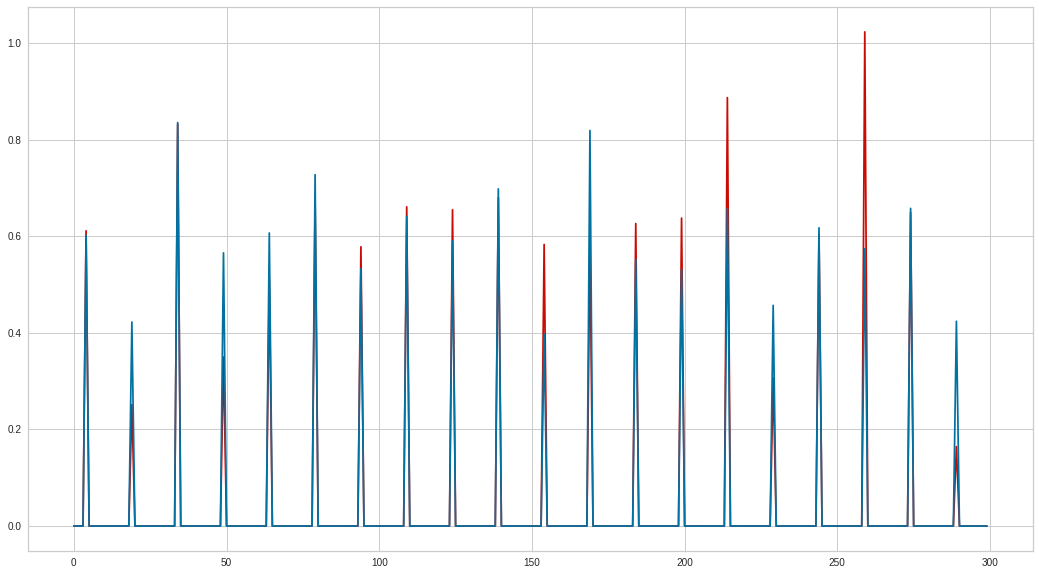

In [40]:
plt.figure(figsize=(18,10))
plt.plot(y_test_w[:300],'r');
plt.plot(knn_bs.predict(X_test_w[:300,:]),'b');

La predicción es muy fiel el principio de la serie del conjunto de test. 

Procedemos a ajustar otro modelo de regresión: SVM con kernel RGF.

In [44]:
w = 15

sdscaler = MinMaxScaler()

X_train_s = sdscaler.fit_transform(X_train_log.to_numpy().reshape(-1, 1))
X_test_s = sdscaler.transform(X_test_log.to_numpy().reshape(-1, 1))

windows_train = np.lib.stride_tricks.sliding_window_view(X_train_s, w+1, axis=0).copy()
X_train_w, y_train_w = windows_train.squeeze()[:,:-1], windows_train.squeeze()[:,-1]

windows_test = np.lib.stride_tricks.sliding_window_view(X_test_s, w+1, axis=0).copy()
X_test_w, y_test_w = windows_test.squeeze()[:,:-1], windows_test.squeeze()[:,-1]

In [45]:
rbsvr =  SVR(kernel='rbf', max_iter=50000, cache_size=2000)
print(1+np.mean(cross_val_score(rbsvr,X_train_w,y_train_w,cv=10,error_score='raise')))

1.6104703251891956


In [46]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}

rbsvr_bs = BayesSearchCV(rbsvr,param,n_iter=15, 
                        cv=TimeSeriesSplit(n_splits=5, gap=4+1), 
                        scoring=make_scorer(mean_squared_error, greater_is_better=False),
                        n_jobs=-1, 
                        refit=True, random_state=0)
rbsvr_bs.fit(X_train_w, y_train_w);

In [47]:
show_html(pd.DataFrame(rbsvr_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
7,"{'C': 1.1481536214968828, 'epsilon': 0.005, 'gamma': 'scale'}",-0.002,1
0,"{'C': 1.513561248436207, 'epsilon': 0.007, 'gamma': 'scale'}",-0.002,2
10,"{'C': 7.943282347242813, 'epsilon': 0.008, 'gamma': 'scale'}",-0.003,3
11,"{'C': 190.54607179632444, 'epsilon': 0.007, 'gamma': 'scale'}",-0.003,4
13,"{'C': 10.471285480508985, 'epsilon': 0.009000000000000001, 'gamma': 'scale'}",-0.003,5


In [48]:
mean_squared_error(y_test_w,rbsvr_bs.predict(X_test_w)), mean_absolute_error(y_test_w,rbsvr_bs.predict(X_test_w))

(0.0028153036213475788, 0.013176815437819681)

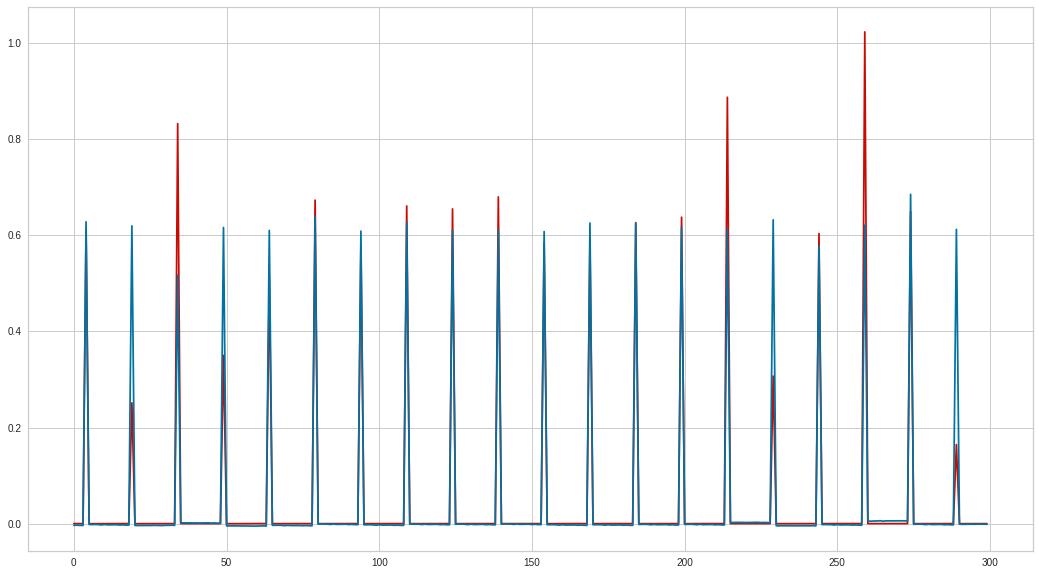

In [49]:
plt.figure(figsize=(18,10))
plt.plot(y_test_w[:300],'r');
plt.plot(rbsvr_bs.predict(X_test_w[:300,:]),'b');

A pesar de que el modelo de predicción da resultados no demasiado acertados, vemos que hay una clara diferencia entre los dos modelos ya que K-nearest neighbours claramente se ajusta mucho mejor.

Usamos el método de permutation importance a nuestro modelo de KNN: 

In [50]:
perm = PermutationImportance(knn_bs.best_estimator_, random_state=1).fit(X_test_w, y_test_w)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.3035 ± 0.1292,Visitants a Barcelona segons municipi d’origen / Badalona
0.4979 ± 0.0644,Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet
0.1027 ± 0.0681,Visitants a Barcelona segons província d’origen / Madrid
0.0824 ± 0.0740,Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat
0.0813 ± 0.0345,Visitants a Barcelona segons província d’origen / Illes Balears
0.0793 ± 0.0375,Visitants a Barcelona segons província d’origen / Tarragona
0.0737 ± 0.0541,Visitants a Barcelona segons província d’origen / Lleida
0.0731 ± 0.0557,Visitants a Barcelona segons municipi d’origen / Terrassa
0.0646 ± 0.0731,Visitants a Barcelona segons municipi d’origen / Sabadell
0.0643 ± 0.0389,Visitants a Barcelona segons província d’origen / Girona


Observamos que la distribución de pesos es muy dispar estando en primera posición los vistantes de Badalona, en segunda (con una gran diferencia) se situa los visitantes de Santa Coloma de Gramenet. El resto de visitantes tienen una distribución mucho más pareja.

### c) Ajusta los modelos random forest y gradient boosting para regresión explorando los hiperparámetros adecuadamente. Elige adecuadamente el modelo que parezca mejor y usa el método de permutation importance sobre el test para determinar qué atributos son más importantes en el modelo para predecir.

Empezamos ajustando los datos al modelo random forest, que ayuda a mejorar posibles desbalances.

In [51]:
cv=10
iter=40

param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'criterion':['friedman_mse', 'poisson', 'squared_error', 'absolute_error'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rf =  RandomForestRegressor(random_state=0)
rf_bs =  BayesSearchCV(rf,param,n_iter=15, cv=5, n_jobs=-1, refit=True, random_state=0)
rf_bs.fit(X_train_log, y_train_log);

In [52]:
show_html(pd.DataFrame(rf_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
0,"{'criterion': 'poisson', 'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 75}",0.729,1
6,"{'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 3, 'n_estimators': 10}",0.720,2
9,"{'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 100}",0.716,3
14,"{'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 2, 'n_estimators': 10}",0.715,4
11,"{'criterion': 'poisson', 'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 75}",0.713,5


In [53]:
prediction = rf_bs.best_estimator_.predict(X_test_log);
R_squared = r2_score(y_test_log,prediction)
results_df = save_results(0.728,R_squared,"RandomForest", results_df)

<Figure size 576x576 with 0 Axes>

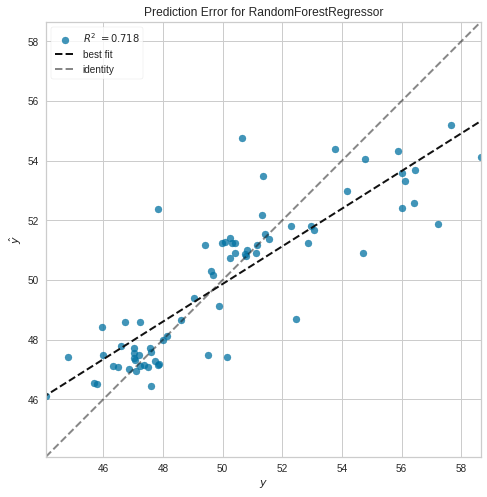

In [54]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(rf_bs.best_estimator_, X_test_log, y_test_log, is_fitted=True)

Podríamos considerar que nuestros datos se ajustan razonablemente bien al modelo, pero claramente no da una puntuación ideal y anteriormente hemos visto modelos que se ajustan de forma mucho más acertada.

A continuación, procedemos a entrenar el modelo regresor de gradient boosting:

In [55]:
param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'loss':['absolute_error', 'squared_error', 'huber', 'quantile'], 
         'criterion':['friedman_mse', 'squared_error'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10], 
         'learning_rate':[0.1,0.5, 1,3, 5, 10, 15]}

gb =  GradientBoostingRegressor(random_state=0,n_iter_no_change=5)
gb_bs =  BayesSearchCV(gb,param,n_iter=40, cv=10, n_jobs=-1, refit=True, random_state=0)
gb_bs.fit(X_train_log, y_train_log);

In [56]:
show_html(pd.DataFrame(gb_bs.cv_results_).loc[:,['params', 'mean_test_score','rank_test_score']].sort_values(by='rank_test_score').head().to_html())

,params,mean_test_score,rank_test_score
2,"{'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.671,1
4,"{'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'quantile', 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 25}",0.213,2
7,"{'criterion': 'squared_error', 'learning_rate': 3.0, 'loss': 'quantile', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 25}",-439.434,3
14,"{'criterion': 'squared_error', 'learning_rate': 3.0, 'loss': 'quantile', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 25}",-1671.027,4
37,"{'criterion': 'squared_error', 'learning_rate': 3.0, 'loss': 'quantile', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 75}",-1671.027,4


In [57]:
prediction = gb_bs.best_estimator_.predict(X_test_log);
R_squared = r2_score(y_test_log,prediction)
results_df = save_results(0.671,R_squared,"GradientBoosting", results_df)

<Figure size 576x576 with 0 Axes>

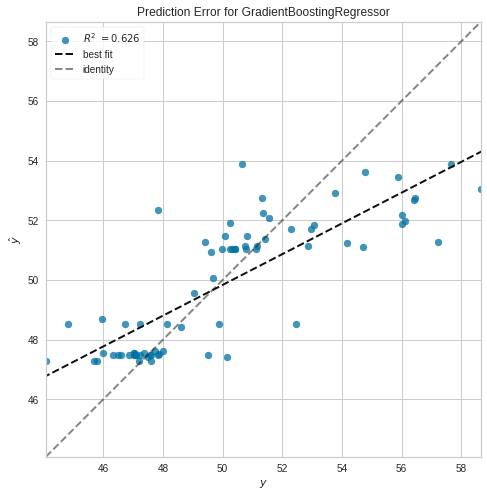

In [58]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(gb_bs.best_estimator_, X_test_log, y_test_log, is_fitted=True)

Gradient boosting se tiene una puntuación de acierto menor al modelo de random forest. Así que el método de permutation importance lo aplicaremos a random forest:

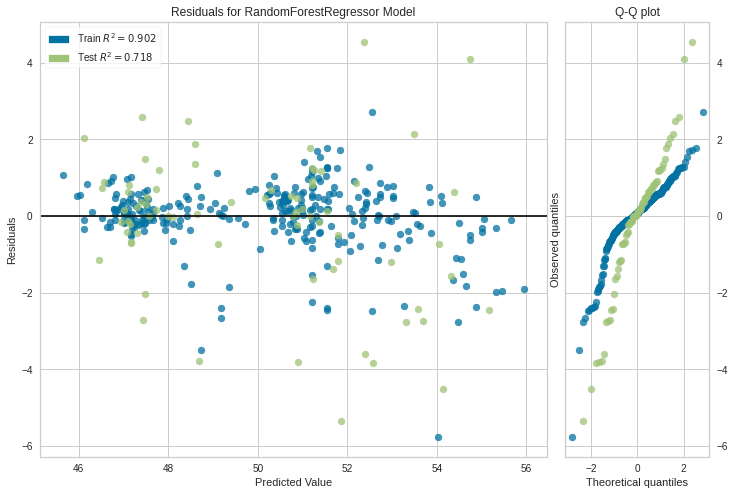

In [59]:
from yellowbrick.regressor import residuals_plot
plt.figure(figsize=(12,8));
viz = residuals_plot(rf_bs.best_estimator_, X_train_log, y_train_log, X_test_log, y_test_log, is_fitted=True, qqplot=True, hist=False);

In [60]:
perm = PermutationImportance(rf_bs.best_estimator_, random_state=1).fit(X_test_log, y_test_log)
eli5.show_weights(perm, feature_names = X_test_log.columns.tolist())

Weight,Feature
0.3834 ± 0.0358,Visitants a Barcelona segons país d’origen / Itàlia
0.1255 ± 0.0320,Visitants a Barcelona segons país d’origen / Països Baixos
0.1017 ± 0.0358,Visitants a Barcelona segons província d’origen / Illes Balears
0.0663 ± 0.0338,Visitants a Barcelona segons província d’origen / Madrid
0.0253 ± 0.0318,Visitants a Barcelona segons província d’origen / Lleida
0.0250 ± 0.0107,Visitants a Barcelona segons província d’origen / Tarragona
0.0241 ± 0.0157,Visitants a Barcelona segons província d’origen / Girona
0.0169 ± 0.0184,Visitants a Barcelona segons país d’origen / França
0.0163 ± 0.0066,Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat
0.0147 ± 0.0187,Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet


Los pesos se reparten de forma bastante equilibrada a pesar de tener una distante primera posición para los visitantes procedentes de Italia. Otros atributos relevantes según el modelo serían los vistantes de Paises Bajos, Islas Baleares y Madrid.

### d) Como hemos visto en teoría, cuando tenemos varios modelos podemos combinarlos usando diferentes estrategias. Entrena un StackedRegressor y un VotingRegressor usando los dos mejores modelos que has encontrado en los apartados anteriores con sus mejores hiperparámetros. ¿Es mejor alguno de estos modelos combinados? Calcula la permutation importance de los atributos sobre el test con estos modelos combinados ¿ha cambiado qué utilizan los modelos combinados para obtener las predicciones? ¿Hay un consenso entre los modelos sobre quienes son los más ruidosos?

A continuación, debemos seleccionar los modelos que mejor han puntuado en nuestros dos apartados anteriores y combinarlos en los siguientes modelos combinados.

In [61]:
#Los dos modelos que se van a combinar
regresores = [('knn', KNeighborsRegressor()), ('rf', RandomForestRegressor())]

In [62]:
regresor_final = LinearRegression()
stacked = StackingRegressor(estimators=regresores, final_estimator=regresor_final)

stacked.fit(X_train_log, y_train_log).score(X_test_log, y_test_log)

0.7144967621742913

Calculamos la permutation importance del modelo combinado StackRegressor:

In [63]:
perm = PermutationImportance(stacked, random_state=1).fit(X_test_log, y_test_log)
eli5.show_weights(perm, feature_names = X_test_log.columns.tolist())

Weight,Feature
0.6569 ± 0.0779,Visitants a Barcelona segons país d’origen / Itàlia
0.0900 ± 0.0274,Visitants a Barcelona segons país d’origen / Països Baixos
0.0697 ± 0.0345,Visitants a Barcelona segons província d’origen / Madrid
0.0615 ± 0.0284,Visitants a Barcelona segons província d’origen / Illes Balears
0.0387 ± 0.0405,Visitants a Barcelona segons província d’origen / Lleida
0.0304 ± 0.0190,Visitants a Barcelona segons província d’origen / Girona
0.0250 ± 0.0183,Visitants a Barcelona segons província d’origen / Tarragona
0.0157 ± 0.0192,Visitants a Barcelona segons país d’origen / França
0.0126 ± 0.0077,Visitants a Barcelona segons municipi d’origen / L'Hospitalet de Llobregat
0.0108 ± 0.0182,Visitants a Barcelona segons país d’origen / Estats Units


In [64]:
voting = VotingRegressor(regresores)

voting.fit(X_train_log, y_train_log).score(X_test_log, y_test_log)

0.5261378859819958

Calculamos la permutation importance del modelo combinado VotingRegressor:

In [65]:
perm = PermutationImportance(voting, random_state=1).fit(X_test_log, y_test_log)
eli5.show_weights(perm, feature_names = X_test_log.columns.tolist())

Weight,Feature
0.3086 ± 0.0405,Visitants a Barcelona segons país d’origen / Itàlia
0.0911 ± 0.0990,Visitants a Barcelona segons municipi d’origen / Terrassa
0.0907 ± 0.0164,Visitants a Barcelona segons país d’origen / Països Baixos
0.0630 ± 0.0168,Visitants a Barcelona segons província d’origen / Madrid
0.0358 ± 0.0113,Visitants a Barcelona segons província d’origen / Illes Balears
0.0226 ± 0.0144,Visitants a Barcelona segons província d’origen / Girona
0.0218 ± 0.0354,Visitants a Barcelona segons província d’origen / Lleida
0.0174 ± 0.0160,Visitants a Barcelona segons país d’origen / França
0.0163 ± 0.0152,Visitants a Barcelona segons municipi d’origen / Santa Coloma de Gramenet
0.0136 ± 0.0162,Visitants a Barcelona segons província d’origen / Tarragona


El modelo StackRegressor es ligeramente superior más preciso que RandomForest, por lo tanto, podemos determinar que es mejor que los modelos del apartado anterior. No obstante, del modelo VotingRegressor no podemos decir lo mismo, pues su puntuación ha resultado bastante por debajo de lo esperado.

A pesar de que la precisión de dichos modelos no es igual de acertada, vemos que existen ciertos atributos que en ambos modelos tienen un peso más elevado respecto la mayoría. Empezando con los visitantes de Italia que en ambos modelos ocupan el primer puesto. También observamos como Países Bajos, Madrid y Islas Baleares se encuentran en posiciones superiores. Estos serían los visitantes más ruidosos según nuestros modelos combinados.